In [29]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d
from tqdm import tqdm

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.tum_vie as tum_dset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
#define time range
t_start = 4.5
duration = 0.2
t_end = t_start + duration
shape = (180, 240)
dataset = "data/slider_close/"

In [96]:
events_raw = np.loadtxt(path + dataset + "events.txt")

In [97]:
events_t = flt.filter_time(events_raw, t_start, t_end)

In [98]:
patch_center = (80, 70)
patch_size = 50
patch_center = (90, 90)
patch_size = 180
shape = (patch_size, patch_size)
events_p = flt.filter_patch(events_t, patch_center, patch_size)

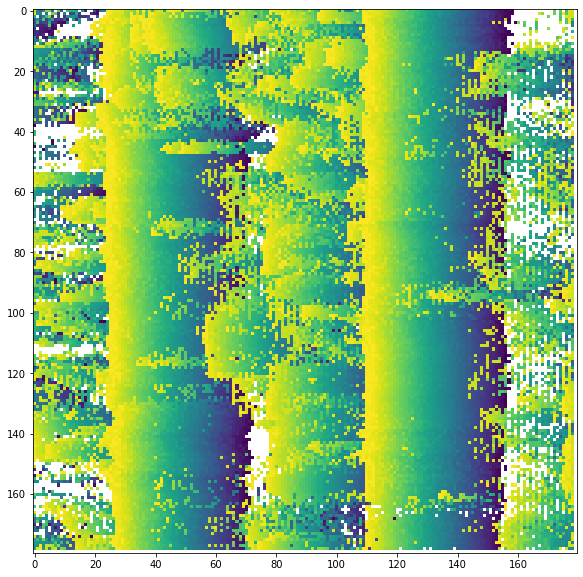

In [99]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events_p, shape, filter_polarity=False, polarity=1)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

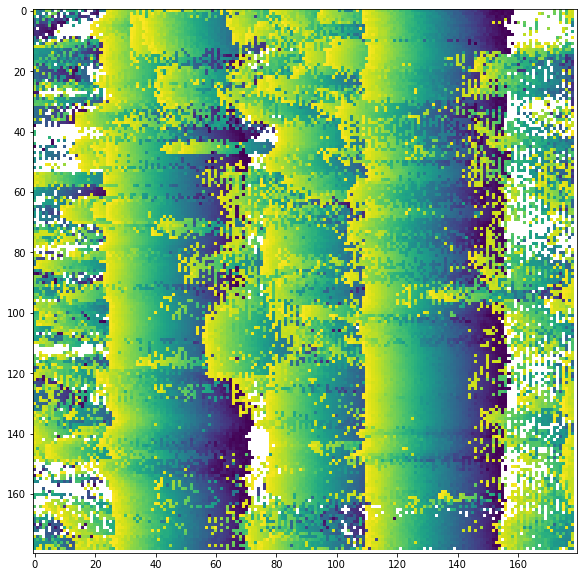

In [189]:
events = flt.filter_refract(events_p, 0.05)
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False, polarity=0)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

In [190]:
calib = np.loadtxt(path + dataset + "calib.txt")

In [191]:
poses = np.loadtxt(path + dataset + "groundtruth.txt")

In [192]:
time_d = td2d.TimeDifference2d(shape, events, poses, calib[0])

(2, 645)


In [193]:
final_td, td_predictions, U, V, diff_list = time_d.compute_time_difference(dist = 2, px_range_pred=9, delay=0.15, avg_n=10, std_mul=0.01, debug=True, start_delay=0.05)

[0. 0. 0.]


100%|█████████████████████████████████████████████████████████████████████████| 55022/55022 [00:03<00:00, 15615.32it/s]

total: 55022
diff: 322
negative: 448
q: 0
ang: 0
ind: 15633
img: 13147
filtered: 0


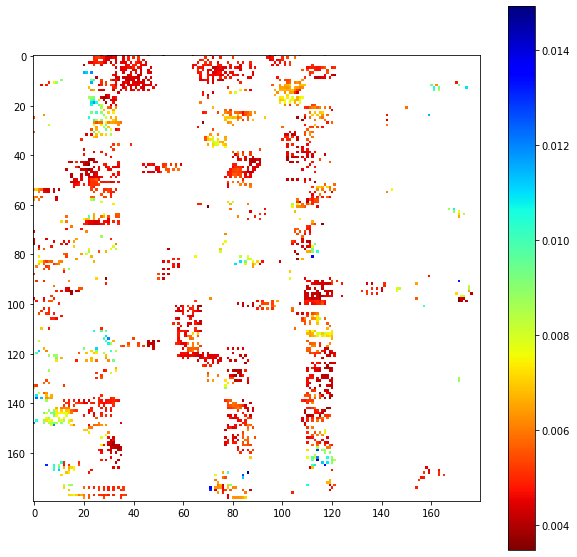

In [194]:
%matplotlib inline
plt.figure(figsize=(10, 10))
final_td_m = np.ma.masked_where(final_td == 0, final_td)
m = plt.imshow(final_td_m, cmap="jet_r", interpolation="none")
plt.colorbar(m)

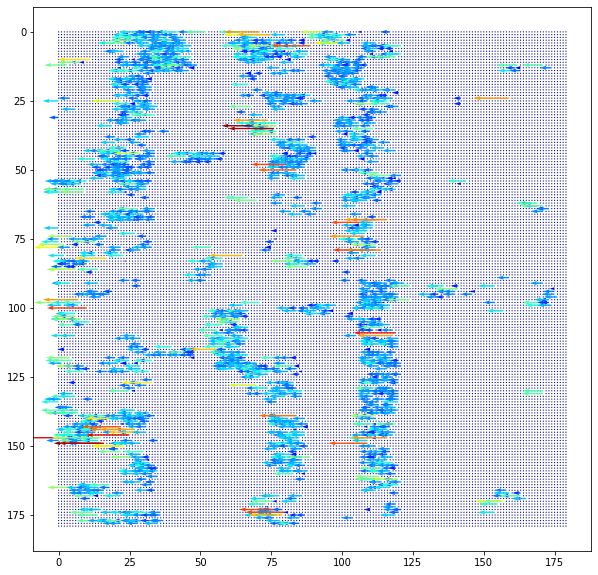

In [195]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.quiver(U, V, U, scale =0.2, cmap="jet_r")
plt.gca().invert_yaxis()

In [196]:
U[0, 6]

0.0

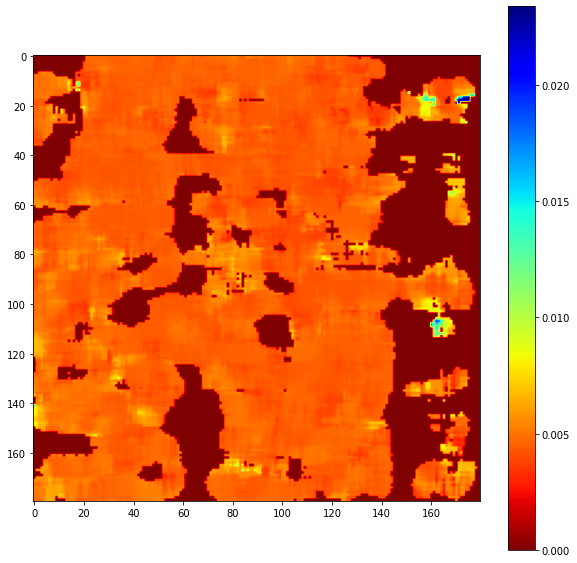

In [197]:
%matplotlib inline
img, count = td.median_from_dict(td_predictions, shape, 10)

plt.figure(figsize=(10, 10))
m = plt.imshow(img, cmap="jet_r")
plt.colorbar(m)

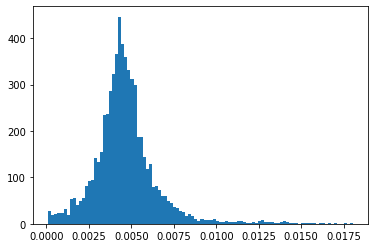

In [198]:
plt.hist(diff_list, 100);

In [199]:
u = np.divide(1.0, final_td_m, where=final_td!=0.0)
v = 0.158864
f = 335.419462958
d = td.v2depth(u, v, f)

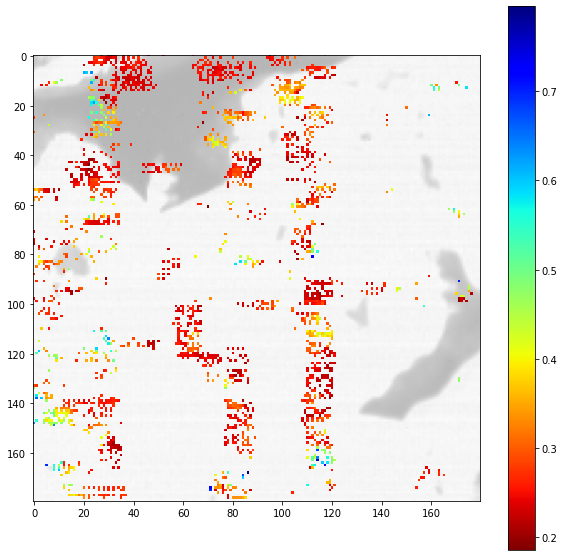

In [200]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img_gray = plt.imread(path + dataset + "/images/frame_00000027.png")
plt.imshow(img_gray, alpha=0.3, cmap="gray")
m = plt.imshow(d, cmap="jet_r", interpolation="none")
plt.colorbar(m)

In [201]:
# %matplotlib qt
# vis.visualize3d(d)

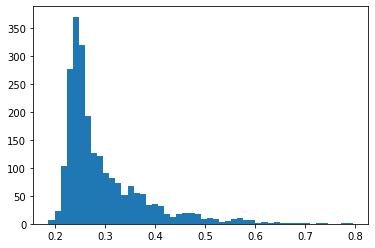

In [202]:
plt.hist(d.compressed(), 50);

In [203]:
np.mean(d.compressed())

0.2940429775887667

In [204]:
np.var(d.compressed())

0.006905363424429818

In [205]:
gt_d = 0.231

In [206]:
mean_error = np.mean(np.abs(d.compressed() - gt_d))
print(mean_error)

0.06558814471673749


In [207]:
median_error = np.median(np.abs(d.compressed() - gt_d))
print(median_error)

0.031287903724236676


In [208]:
p = mean_error / (d.compressed().max() - d.compressed().min())

In [209]:
p * 100

10.759847758564407

In [210]:
print("mean error: {}\nmedian error: {}\nrelative error: {}".format(mean_error, median_error, p*100))

mean error: 0.06558814471673749
median error: 0.031287903724236676
relative error: 10.759847758564407
